# Assignment 3 - Supervised Learning

## *Morgan Ringel*
Netid:  *mjr52*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1-e^x}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model paramters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial dervatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear seperable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration of the algorithm. Divide you data into a training and testing set where the test set accounts for 30 percent of the data and the test set the remaining 70 percent. In doing this you'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to?
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient?
3. Stopping criteria - when should the algorithm be finished searching for the optimum?

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different initializations, learning rates, and stopping criteria. What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why?

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing as well as using linear regression. Show ROC curves for both and your model all on one plot. How does your model compare in terms of performance?

**ANSWER**

**(a)** The likelihood function of the data that we wish to maximize:

$ P(\mathbf{x}  |  p) = p^{\sum x_i} (1-p)^{N-\sum x_i}$

$$ P(\mathbf{Y}|\mathbf{X}) = \displaystyle\prod_{i=1}^N P(y_i | \mathbf{x_i}) = 
\displaystyle\prod_{i=1}^N P(y_i = 1| \mathbf{x_i})^{y_i} P(y_i = 0| \mathbf{x_i})^{1-y_i} \\ 
=\displaystyle\prod_{i=1}^N \sigma(\mathbf{w}^T \mathbf{x}_i)^{y_i} [1 - \sigma(\mathbf{w}^T \mathbf{x}_i)]^{1 - {y_i}}$$



**(b)** The cost function: 

$$C(\mathbf{w}) = -\displaystyle\sum_{i=1}^N [y_i \ln(\sigma(\mathbf{w}^T \mathbf{x}_i))] + 
[(1-{y_i}) \ln(1 - \sigma(\mathbf{w}^T \mathbf{x}_i))]$$


**(c)** Calculate the gradient of the cost function:
$$\frac{\partial C}{\partial w_j} = -\displaystyle\sum_{i=1}^N[y_i -\sigma(\mathbf{w}^T \mathbf{x}_i)]x_{i,j} \\
\nabla_{\mathbf{w}}C(\mathbf{w}) = -\displaystyle\sum_{i=1}^N[y_i -\sigma(\mathbf{w}^T \mathbf{x}_i)]\mathbf{x_i}\\
\left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right] = 
\left[-\displaystyle\sum_{i=1}^N[y_i -\sigma(\mathbf{w}^T \mathbf{x}_i)]x_{i,0},
-\displaystyle\sum_{i=1}^N[y_i -\sigma(\mathbf{w}^T \mathbf{x}_i)]x_{i,1},
-\displaystyle\sum_{i=1}^N[y_i -\sigma(\mathbf{w}^T \mathbf{x}_i)]x_{i,2}\right]$$

**(d)** Gradient descent update equation:
$$ \mathbf{w}^{i+1} = \mathbf{w}^i - \eta\nabla_{\mathbf{w}}C(\mathbf{w})
$$

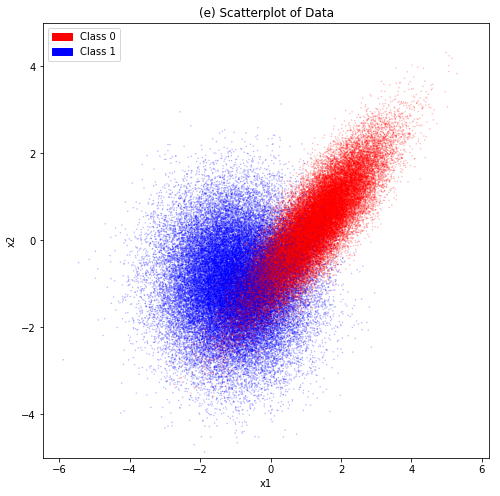

In [210]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

df = pd.read_csv('./data/A3_Q1_data.csv')

plt.figure(figsize=(8,8))
colors=['red', 'blue']
plt.scatter(df['x1'], df['x2'] , c=df['y'], cmap=matplotlib.colors.ListedColormap(colors), alpha=.3, s=.2)
plt.xlabel('x1')
plt.ylabel('x2')
plt.ylim([-5, 5])
red_patch = mpatches.Patch(color=colors[0], label='Class 0')
blue_patch = mpatches.Patch(color=colors[1], label='Class 1')
plt.legend(handles=[red_patch, blue_patch])
plt.title('(e) Scatterplot of Data')
plt.show()

**(e)** As seen in the plot above, the data do appear seperable.  Class 0 is located more to the right side and class 1 is located more to the left side.  Logistic regression is a good choice since the data is binary (a member of one of two classes) and appears linearly seperable.  Also, the sample size is large enough for logistic regression.

**(f)** The data do not require any preprocessing.  As seen in the scatterplot, there are no significant outliers or missing values.  The next training and testing steps were successful without preprocessing.

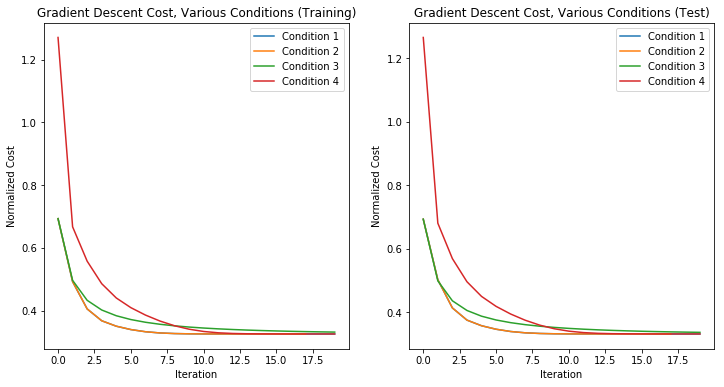

In [140]:
from sklearn.model_selection import train_test_split

# (g) Create a function or class to implement your logistic regression.
    # Inputs: weights, xi features
    # Output: class probabilities
    # Code adapted from http://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html 
    
def log(z):
    return np.log(z+1e-8)

def sigmoid(z):
  return 1.0 / (1 + np.exp(-z))
    
def predict(xi, w):
    probs = sigmoid(np.dot(xi, w))
    return probs


# (h) Create a function that computes the cost function
    # Inputs: xi (features), yi (labels), model parameters (weights)
    # Output: C(w) cost function
    # Code adapted from http://ml-cheatsheet.readthedocs.io/en/latest/logistic_regression.html
def cost(xi, yi, w):
    predictions = predict(xi, w)
    c0_cost = -yi*log(predictions)
    c1_cost = -(1-yi)*log(1-predictions)
    cost = (c0_cost + c1_cost).sum()
    return cost

def gradient(xi, yi, w):
    predictions = predict(xi, w)
    gradient = -np.dot((yi-predictions),xi)
    return gradient

def update_weights(xi, yi, w, eta):
    w = w - eta*gradient(xi, yi, w)
    return w

x1 = df['x1'].values
x2 = df['x2'].values
x0 = np.ones(np.shape(x1))
xi = np.stack((x0, x1, x2), axis=1)
yi = df['y'].values
w = np.array([0, 0, 0])

X_train, X_test, y_train, y_test = train_test_split(xi, yi, test_size=0.30)
def batch(xi, yi, xt, yt, w, eta, sc):
    c1 = cost(xi, yi, w)
    c1t = cost(xt, yt, w)
    c0 = 2*c1
    cost_array=np.array([c1])
    cost_arrayt=np.array([c1t])
    while (c0-c1>sc):
        w = update_weights(xi, yi, w, eta)
        c0 = c1
        c1 = cost(xi, yi, w)
        c1t = cost(xt, yt, w)
        cost_array = np.append(cost_array, np.array([c1]))
        cost_arrayt = np.append(cost_arrayt, np.array([c1t]))
    return w, cost_array, cost_arrayt
    

# (i), (j), and (k): Batch Gradient Descent with various initializations, learning rates, and stopping criteria    
# Condition 1: Stopping criteria 1e-4, [0 0 0] initialization, eta=.0001
w, cost_array, cost_arrayt = batch(X_train, y_train, X_test, y_test, np.array([0,0,0]), .0001, 1e-4)
train_cond1= (cost_array/np.size(y_train))
test_cond1=  (cost_arrayt/np.size(y_test))

# Condition 2: Stopping criteria 1e-8, [0 0 0] initialization, eta=.0001
w, cost_array, cost_arrayt = batch(X_train, y_train, X_test, y_test, np.array([0,0,0]), .0001, 1e-2)
train_cond2= (cost_array/np.size(y_train))
test_cond2=  (cost_arrayt/np.size(y_test))

# Condition 3: Stopping criteria 1e-4, [0 0 0] initialization, eta=.00001
w, cost_array, cost_arrayt = batch(X_train, y_train, X_test, y_test, np.array([0,0,0]), .00001, 1e-4)
train_cond3= (cost_array/np.size(y_train))
test_cond3=  (cost_arrayt/np.size(y_test))

# Condition 4: Stopping criteria 1e-4, [.5 .5 .5] initialization, eta=.0001
w, cost_array, cost_arrayt = batch(X_train, y_train, X_test, y_test, np.array([.5, .5, .5]), .0001, 1e-4)
train_cond4= (cost_array/np.size(y_train))
test_cond4=  (cost_arrayt/np.size(y_test))

plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
plt.plot(train_cond1[0:20], label="Condition 1")
plt.plot(train_cond2[0:20], label='Condition 2')
plt.plot(train_cond3[0:20], label='Condition 3')
plt.plot(train_cond4[0:20], label='Condition 4')
plt.legend()
plt.title('Gradient Descent Cost, Various Conditions (Training)')
plt.ylabel('Normalized Cost')
plt.xlabel('Iteration')

plt.subplot(1, 2, 2)
plt.plot(test_cond1[0:20], label="Condition 1")
plt.plot(test_cond2[0:20], label='Condition 2')
plt.plot(test_cond3[0:20], label='Condition 3')
plt.plot(test_cond4[0:20], label='Condition 4')
plt.legend()
plt.title('Gradient Descent Cost, Various Conditions (Test)')
plt.ylabel('Normalized Cost')
plt.xlabel('Iteration')
plt.show()

**(k)** As seen in the plots above, changing the initial values for learning rate, weights, and stopping criteria have effects on how the cost function changes with each iteration for gradient descent.  Changing the stopping criteria (Condition 1 vs. Condition 2) does not change the shape of the graph but changes how many iterations the algorithm does until it terminates.  Changing the learning rate (Condition 1 vs. Condition 3) changes how fast the iterations reach the minimum asymptote. Changing the initial weights (Condition 1 vs. Condition 4) changes the starting point of the cost function.  In this approach, I chose to change only one variable (learning rate, weights, or stopping criteria) at a time.  I made this choice so that it would be easy to visually compare the affect of that variable on the cost.

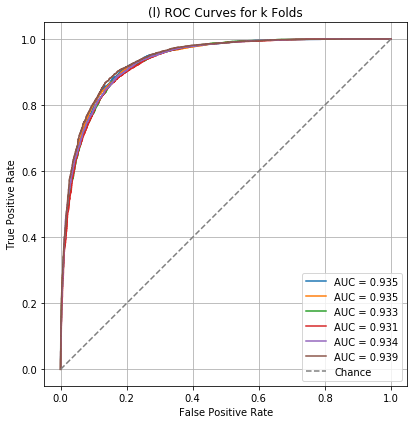

In [153]:
# Cross Validation of Model

from sklearn.model_selection import StratifiedKFold
import sklearn.metrics as metrics
    
def plot_roc(labels, prediction_scores):
    fpr, tpr, _ = metrics.roc_curve(labels, prediction_scores, pos_label=1)
    auc = metrics.roc_auc_score(labels, prediction_scores)
    legend_string = 'AUC = {:0.3f}'.format(auc)
    plt.plot(fpr, tpr, label=legend_string)   

skf = StratifiedKFold(n_splits=6, random_state=None, shuffle=False)
plt.figure(figsize = (6,6))

for train_index, test_index in skf.split(X_train, y_train):
    X_ktrain, X_ktest = X_train[train_index], X_train[test_index]
    y_ktrain, y_ktest = y_train[train_index], y_train[test_index]
    
    w, cost_array, cost_arrayt = batch(X_ktrain, y_ktrain, X_ktest, y_ktest, np.array([0,0,0]), .0001, 1e-4)
    yhat = predict(X_ktest, w)
    plot_roc(y_ktest, yhat)
  
plt.title('(l) ROC Curves for k Folds')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid('on')
plt.axis('square')
plt.tight_layout()
plt.plot([0, 1], [0, 1], '--', color='gray', label='Chance')
plt.legend()
plt.show()

**(m)** Cross validation is used because it allows all of the avaliable training data to be used as both the training sets and validation sets.  Because of this, the average values from the k-fold cross validation method give a more accurate estimate of th model parameters and performance, indicating how well the model will generalize.  Also, cross validation can be used to estimate the model's hyperparameters, using it not only for model evaluation but also for model selection.  Using k-fold cross validation can provide feedback on the performance of hyperparameters, allowing the algorithm to select the optimal hyperparameters to improve performance.

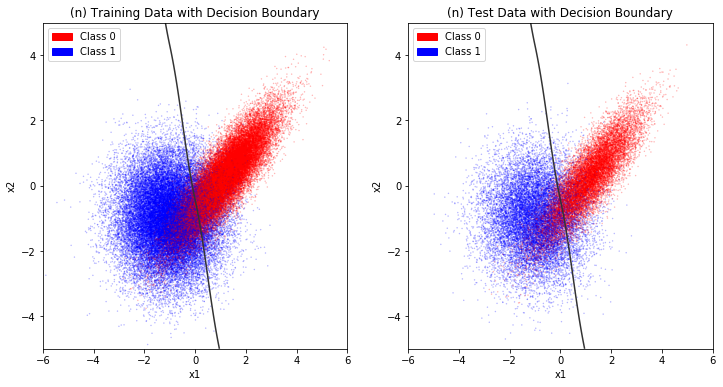

In [211]:
import matplotlib

# (n) Plot training and test data with classifier line
w, cost_array, cost_arrayt = batch(X_train, y_train, X_test, y_test, np.array([0,0,0]), .0001, 1e-4)

xx, yy = np.mgrid[-6:6.01, -5:5:.01]
grid = np.c_[np.ones(np.shape(xx.ravel())), xx.ravel(), yy.ravel()]
probs = predict(grid, w)
probs = np.reshape(probs, np.shape(xx))

plt.figure(figsize = (12,6))
plt.subplot(1, 2, 1)
colors=['red', 'blue']
plt.scatter(X_train[:,1], X_train[:,2] , c=y_train, cmap=matplotlib.colors.ListedColormap(colors), alpha=.3, s=.2)
plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=0.6)
plt.xlabel('x1')
plt.ylabel('x2')
plt.ylim([-5, 5])
red_patch = mpatches.Patch(color=colors[0], label='Class 0')
blue_patch = mpatches.Patch(color=colors[1], label='Class 1')
plt.legend(handles=[red_patch, blue_patch])
plt.title('(n) Training Data with Decision Boundary')


plt.subplot(1, 2, 2)
colors=['red', 'blue']
plt.scatter(X_test[:,1], X_test[:,2] , c=y_test, cmap=matplotlib.colors.ListedColormap(colors), alpha=.3, s=.2)
plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=0.6)
plt.xlabel('x1')
plt.ylabel('x2')
plt.ylim([-5, 5])
red_patch = mpatches.Patch(color=colors[0], label='Class 0')
blue_patch = mpatches.Patch(color=colors[1], label='Class 1')
plt.legend(handles=[red_patch, blue_patch])
plt.title('(n) Test Data with Decision Boundary')
plt.show()


**(n)** The plots of the training data and the test data with the classifier decision boundary are shown above.  Although the decision boundary does a good job of separating the two classes, it does make some errors because the two classes overlap.  Using a classification model with more flexibility might improve performance.

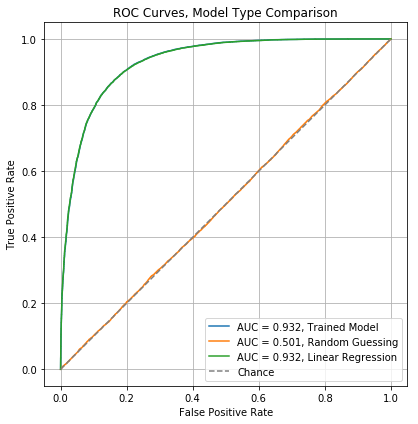

In [222]:
from sklearn import linear_model

# (o) Trained Model vs Random Guessing vs Linear Regression

def plot_roc(labels, prediction_scores, text):
    fpr, tpr, _ = metrics.roc_curve(labels, prediction_scores, pos_label=1)
    auc = metrics.roc_auc_score(labels, prediction_scores)
    legend_string = 'AUC = {:0.3f}, '.format(auc) + text
    plt.plot(fpr, tpr, label=legend_string)   
    
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
y_lr_hat = lr.predict(X_test)

plt.figure(figsize=(6,6))
plot_roc(y_test, predict(X_test, w), 'Trained Model')
plot_roc(y_test, np.random.random_sample(np.shape(y_test)), 'Random Guessing')
plot_roc(y_test, y_lr_hat, 'Linear Regression')
plt.title('ROC Curves, Model Type Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid('on')
plt.axis('square')
plt.tight_layout()
plt.plot([0, 1], [0, 1], '--', color='gray', label='Chance')
plt.legend()
plt.show()


**(o)** As shown in the ROC curves above, both the trained model and linear regression model performed significantly better than random guessing.  However, the trained model did not outperform the linear regression model.

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a linear model classifier (e.g. logistic regression) apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) Area Under the Curve (AUC). Describe the implications of your findings.

Extracting /hw_digits\train-images-idx3-ubyte.gz
Extracting /hw_digits\train-labels-idx1-ubyte.gz
Extracting /hw_digits\t10k-images-idx3-ubyte.gz
Extracting /hw_digits\t10k-labels-idx1-ubyte.gz


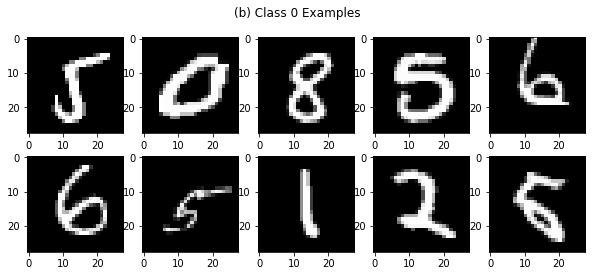

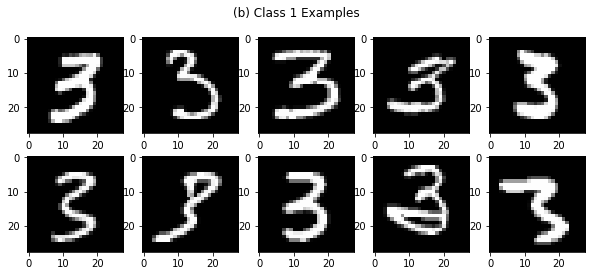

In [24]:
import tensorflow as tf
from mnist import read_data_sets
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

# Import data, read_data_sets taken from 
#https://github.com/tensorflow/tensorflow/blob/master/tensorflow/contrib/learn/python/learn/datasets/mnist.py
data = read_data_sets('/hw_digits', validation_size=0)

train_x, train_y = data.train.next_batch(data.train._num_examples)
test_x, test_y = data.test.next_batch(data.test._num_examples)

# Method adapted from
#https://stackoverflow.com/questions/42353676/display-mnist-image-using-matplotlib
def gen_image(arr):
    plt.figure(figsize=(2,2))
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    return plt

# Part (a) -Construct the Dataset
# Relabel y values (0,1 Classification)
train_y[train_y !=3]=0
train_y[train_y ==3] = 1
test_y[test_y !=3] =0
test_y[test_y ==3] =1


# Part (b) - Plot 10 examples of each class 0 and 1, from the training dataset
c0_select = np.random.choice(np.ravel(np.where(train_y==0)), 10, False)
c1_select = np.random.choice(np.ravel(np.where(train_y==1)), 10, False)

plt.figure(figsize=(10, 4))
plt.suptitle('(b) Class 0 Examples')
i = 1
for c0_samp in c0_select:
    ax = plt.subplot(2, 5, i)
    two_d = (np.reshape(train_x[c0_samp], (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    i = i+1
plt.show()

plt.figure(figsize=(10, 4))
plt.suptitle('(b) Class 1 Examples')
i = 1
for c1_samp in c1_select:
    ax = plt.subplot(2, 5, i)
    two_d = (np.reshape(train_x[c1_samp], (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest', cmap='gray')
    i = i+1
plt.show()

# Part (c) - Sizes of each class
c0_size = (np.size(np.where(train_y==0))+np.size(np.where(test_y==0)))
c1_size = (np.size(np.where(train_y==1))+np.size(np.where(test_y==1)))

**ANSWER**

**(a)** See code above.

**(b)** See plots above.

**(c)** Out of the 70,000 examples that make up the training and test data, 62,859 are from class 0 and 7,141 are from class 1.  The classes are not balanced.  This might cause issues because a trivial classifier that classifies all images as class 0 would have about 90% accuracy.  Therefore, caution must be taken to make sure the model is not overfitting to class 0 and to improve upon the accuracy in identifying class 1.

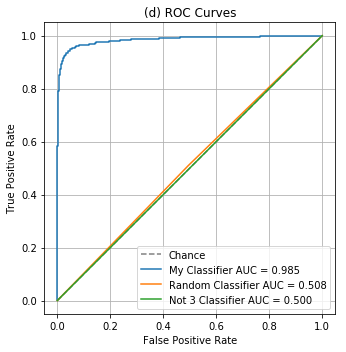

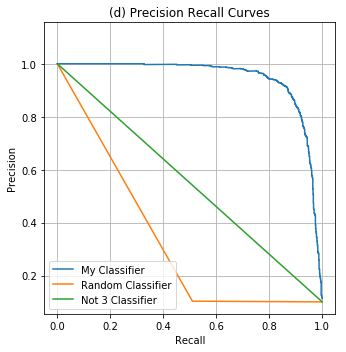

In [101]:
from sklearn import linear_model
from sklearn.model_selection import StratifiedKFold
import sklearn.metrics as metrics
# Part (d) - Train and test a classifier
# Use Logistic Regression as Classifier

# Import Data
data = read_data_sets('/hw_digits', validation_size=0)
train_x, train_y = data.train.next_batch(data.train._num_examples)
test_x, test_y = data.test.next_batch(data.test._num_examples)
train_y[train_y !=3]=0
train_y[train_y ==3] = 1
test_y[test_y !=3] =0
test_y[test_y ==3] =1

# Make necessary methods for Logistic Regression Classifier
def sigmoid(z):
  return 1.0 / (1 + np.exp(-z))
    
def predict(xi, w):
    probs = sigmoid(np.dot(xi, w))
    return probs

# Train Logistic Regression Classifier with k-fold cross validation
skf = StratifiedKFold(n_splits=6, random_state=None, shuffle=False)
allweights=np.empty((6,784))
i=0

for train_index, test_index in skf.split(train_x, train_y):
    x_ktrain, x_ktest = train_x[train_index], train_x[test_index]
    y_ktrain, y_ktest = train_y[train_index], train_y[test_index]
    
    lr = linear_model.LogisticRegression()
    lr.fit(x_ktrain, y_ktrain)
    allweights[i] = lr.coef_.ravel()
weights = np.mean(allweights, axis=0)

# My Logistic Regression Classifier
test_yhat_model = predict(test_x, weights)
# Random Guess classifier
test_yhat_random = np.random.randint(0, high=2, size=np.shape(test_y))
# Not 3's classifier
test_yhat_not3 = np.zeros(np.shape(test_y))

def plot_roc(labels, c1, c2, c3):
    fpr1, tpr1, _ = metrics.roc_curve(labels, c1, pos_label=1)
    auc1 = metrics.roc_auc_score(labels, c1)
    legend_string1 = 'My Classifier AUC = {:0.3f}'.format(auc1)
    
    fpr2, tpr2, _ = metrics.roc_curve(labels, c2, pos_label=1)
    auc2 = metrics.roc_auc_score(labels, c2)
    legend_string2 = 'Random Classifier AUC = {:0.3f}'.format(auc2)
    
    fpr3, tpr3, _ = metrics.roc_curve(labels, c3, pos_label=1)
    auc3 = metrics.roc_auc_score(labels, c3)
    legend_string3 = 'Not 3 Classifier AUC = {:0.3f}'.format(auc3)

    plt.figure(figsize=(5, 5))
    plt.title('(d) ROC Curves')
    plt.plot([0, 1], [0, 1], '--', color='gray', label='Chance')
    plt.plot(fpr1, tpr1, label=legend_string1)
    plt.plot(fpr2, tpr2, label=legend_string2)
    plt.plot(fpr3, tpr3, label=legend_string3)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid('on')
    plt.axis('square')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
def plot_precrec(labels, c1, c2, c3):
    p1, r1, _ = metrics.precision_recall_curve(labels, c1, pos_label=1)
    p2, r2, _ = metrics.precision_recall_curve(labels, c2, pos_label=1)
    p3, r3, _ = metrics.precision_recall_curve(labels, c3, pos_label=1)
    
    #plt.step(r1, p1, where='post', label='My Classifier')
    #plt.step(r2, p2, where='post', label='Random Classifier')
    #plt.step(r3, p3, where='post', label='Not 3 Classifier')
    
    plt.figure(figsize=(5, 5))
    plt.title('(d) Precision Recall Curves')
    plt.plot(r1, p1, label='My Classifier')
    plt.plot(r2, p2,  label='Random Classifier')
    plt.plot(r3, p3, label='Not 3 Classifier')
    
    plt.grid('on')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.axis('square')
    plt.legend()
    plt.tight_layout()
    plt.show()
    
plot_roc(test_y, test_yhat_model, test_yhat_random, test_yhat_not3)
plot_precrec(test_y, test_yhat_model, test_yhat_random, test_yhat_not3)

**(d)** As seen in the ROC and Precision Recall curves above, the classifier trained with cross validation performs significantly better than the random guess classifier and the negative classifier.  There are no discrepancies to discuss.

Extracting /hw_digits\train-images-idx3-ubyte.gz
Extracting /hw_digits\train-labels-idx1-ubyte.gz
Extracting /hw_digits\t10k-images-idx3-ubyte.gz
Extracting /hw_digits\t10k-labels-idx1-ubyte.gz


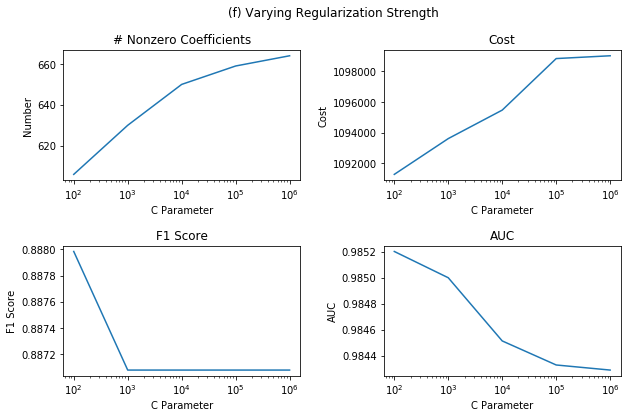

In [88]:
from sklearn import linear_model
from sklearn.metrics import f1_score

# Import Data
data = read_data_sets('/hw_digits', validation_size=0)
train_x, train_y = data.train.next_batch(data.train._num_examples)
test_x, test_y = data.test.next_batch(data.test._num_examples)
train_y[train_y !=3]=0
train_y[train_y ==3] = 1
test_y[test_y !=3] =0
test_y[test_y ==3] =1

# Redefine Cost Function from Q1
def log(z):
    return np.log(z+1e-8)

def sigmoid(z):
  return 1.0 / (1 + np.exp(-z))
    
def predict(xi, w):
    probs = sigmoid(np.dot(xi, w))
    return probs

def cost(xi, yi, w):
    predictions = predict(xi, w)
    c0_cost = -yi*log(predictions)
    c1_cost = -(1-yi)*log(1-predictions)
    cost = (c0_cost + c1_cost).sum()
    return np.abs(cost)

crange = np.logspace(2, 6, num=5)
wdata = np.empty(np.shape(crange))
costdata= np.empty(np.shape(crange))
f1data= np.empty(np.shape(crange))
aucdata= np.empty(np.shape(crange))

for i, c in enumerate(crange):
    lr = linear_model.LogisticRegression(penalty='l1', C=c)
    lr.fit(train_x, train_y)

    # Nonzero Model parameters
    w = lr.coef_
    wdata[i] = np.size(w[w !=0])

    # LR cost function
    costnum = cost(test_x, test_y, w.ravel())
    costdata[i] = costnum

    # F1 score
    yclass = lr.predict(test_x)
    f1 = f1_score(test_y, yclass)
    f1data[i] = f1

    # AUC
    yhat = lr.predict_proba(test_x)
    auc = metrics.roc_auc_score(test_y, yhat[:, 1])
    aucdata[i] = auc


plt.figure(figsize=(10,6))
plt.suptitle('(f) Varying Regularization Strength')
plt.subplot(2, 2, 1)
plt.semilogx(crange, wdata)
plt.xlabel('C Parameter')
plt.ylabel('Number')
plt.title('# Nonzero Coefficients')

plt.subplot(2, 2, 2)
plt.semilogx(crange, costdata)
plt.xlabel('C Parameter')
plt.ylabel('Cost')
plt.title('Cost')

plt.subplot(2, 2, 3)
plt.semilogx(crange, f1data)
plt.xlabel('C Parameter')
plt.ylabel('F1 Score')
plt.title('F1 Score')

plt.subplot(2, 2, 4)
plt.semilogx(crange, aucdata)
plt.xlabel('C Parameter')
plt.ylabel('AUC')
plt.title('AUC')

plt.subplots_adjust(hspace=0.5, wspace=0.35)
plt.show()

**(f)**  Regularization is the penalty against complexity.  Increasing the regularization strengh makes the model more general and less likely to overfit to the training data.  As seen in the plots above, the regularization strength effects the number of nonzero coefficients in the logistic regression model, the cost function, the F1 score, and the AUC.  As the regularization strength increases, the number of nonzero coefficients decreases.  This is to be expected since the model is becoming more general with more zero coefficients.  As the regularization strength increases, the output of the cost function decreases.  This is to be expected up to a certain point since the model is becoming more general and will perform better on the test data.  As the regularization strength increases, the F1 score increases.  This is to be expected up to a certain point since, like with the cost, the model is becoming more general and will perform better on the test data.  As the regularization strength increases, the AUC increases.  Again, this is to be expected up to a certain point because the model is becoming more general and will perform better on the test data.

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 
I will use linear regression for this supervised learning question.  The target variable is the cost of insurance which is quantitative, making this a regression question.  The weights of a linear regression equation can be optimized from the training data to create a model that will generalize to predict the cost of health insurance.


**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?
Performance of this model will be evaluated with mean square error and $R^2$ statistics.


**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.
The approach taken for this model is dividing the dataset into training and testing datasets.  Cross validation is useful for when there is a limited amount of data or when there are hyperparameters.  There are 1,338 entries in this dataset which means that there is a enough data for both training and testing.  Also, this model does not have hyperparameters - it only has the weights as its parameters.  Although cross validation is a useful supervised learning tool, it is not necessary in this case.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performend, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to descrive this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

**(a)** In 2015, the United States spent a total of \$3.2 trillion on health care, or 17.8$\%$ of gross domestic product.  The average American had healthcare charges of approximately \$10,000.$^1$  Knowing the average cost of healthcare provides a general idea of how much healthcare costs.  However, is there information that can be used to get a more accurate and individualized estimate of healthcare costs?  How do healthcare costs vary from person to person in the United States?  What factors effect healthcare costs?  One can answer these questions by using past healthcare cost data in combination with other information to create a model that can predict an individual's annual healthcare costs.  This model would benefit both individuals who want to better estimate their healthcare costs and insurance companies who need to create pricing strategies for their health insurance plans.

$^1$ https://www.thebalance.com/causes-of-rising-healthcare-costs-4064878

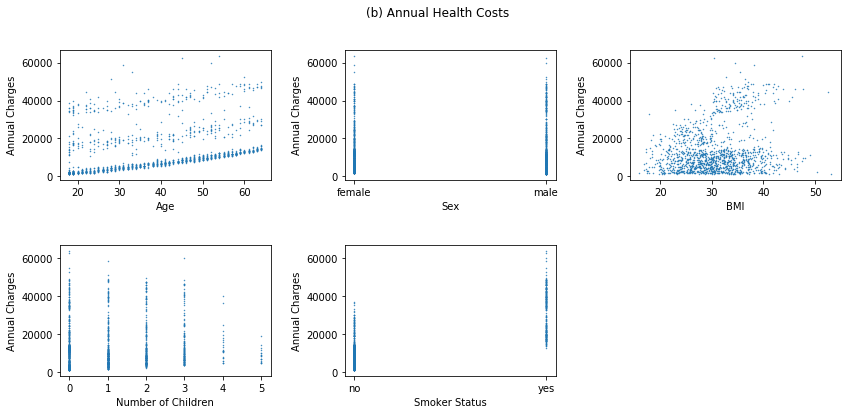

In [105]:
# Question: Accurately predict healthcare costs.
# Data: https://www.kaggle.com/mirichoi0218/insurance

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data=pd.read_csv('insurance.csv')
plt.figure(figsize=(14, 6))
plt.suptitle('(b) Annual Health Costs')

plt.subplot(2, 3, 1)
plt.scatter(data['age'], data['charges'], s=.2)
plt.xlabel('Age')
plt.ylabel('Annual Charges')

plt.subplot(2, 3, 2)
plt.scatter(data['sex'], data['charges'], s=.2)
plt.xlabel('Sex')
plt.ylabel('Annual Charges')

plt.subplot(2, 3, 3)
plt.scatter(data['bmi'], data['charges'], s=.2)
plt.xlabel('BMI')
plt.ylabel('Annual Charges')

plt.subplot(2, 3, 4)
plt.scatter(data['children'], data['charges'], s=.2)
plt.xlabel('Number of Children')
plt.ylabel('Annual Charges')

plt.subplot(2, 3, 5)
plt.scatter(data['smoker'], data['charges'],s=.2)
plt.xlabel('Smoker Status')
plt.ylabel('Annual Charges')
plt.subplots_adjust(hspace=0.5, wspace=0.35)
plt.show()

**(c)** (a) The target variable in this supervised learning question is annual cost of healthcare.  There predictors avaliable are age, sex, body mass index (bmi), number of children, and whether the individual is a smoker or non-smoker.
(b) The dataset does require preprocessing.  The sex and smoker variables are binary but are reported in the original data table as text.  It is necessary to convert those to binary variables.

**(d)** I will use linear regression for this supervised learning question.  The target variable is the cost of insurance which is quantitative, making this a regression question.  The weights of a linear regression equation can be optimized from the training data to create a model that will generalize to predict the cost of health insurance.


**(e)** Performance of this model will be evaluated with mean square error and $R^2$ statistics.


**(f)** The approach taken for this model is dividing the dataset into training and testing datasets.  Cross validation is useful for when there is a limited amount of data or when there are hyperparameters.  There are 1,338 entries in this dataset which means that there is a enough data for both training and testing.  Also, this model does not have hyperparameters - it only has the weights as its parameters.  Although cross validation is a useful supervised learning tool, it is not necessary in this case.


    (g) The linear regression model from the training data is 
     y = -11001.6147 + 249.9801[age] + 43.4042[sex] + 299.7510[BMI] +485.5390[children] +23611.0437[smoker] 

    R^2 = 0.7736
    MSE = 36376596.6472



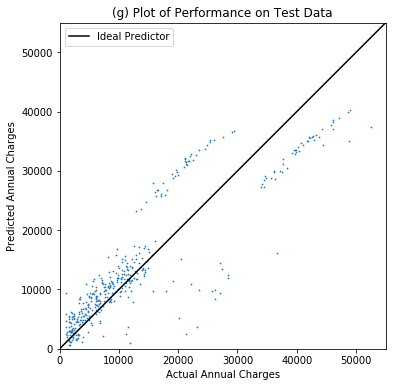

In [104]:
X = np.array((data['age'], (data['sex']=='male'), data['bmi'], data['children'], (data['smoker']=='yes'))).T
y = data['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
lr=linear_model.LinearRegression()
lr.fit(X_train, y_train)
yhat = lr.predict(X_test)

a1 = (lr.coef_)
a0 = (lr.intercept_)
r2 = (r2_score(y_test, yhat))
mse = mean_squared_error(y_test, yhat)

print('    (g) The linear regression model from the training data is \n     y = {:.4f} + {:.4f}[age] + \
{:.4f}[sex] + {:.4f}[BMI] +{:.4f}[children] +{:.4f}[smoker] \n'.format(a0, a1[0], a1[1], a1[2], a1[3], a1[4]))
print('    R^2 = {:.4f}'.format(r2))
print('    MSE = {:.4f}\n'.format(mse))

plt.figure(figsize=(6,6))
plt.scatter(y_test, yhat, s=.5)
plt.plot(range(1, 55000), range(1,55000),c='black', label='Ideal Predictor')
plt.legend()
plt.axis('square')
plt.xlabel('Actual Annual Charges')
plt.ylabel('Predicted Annual Charges')
plt.title('(g) Plot of Performance on Test Data')
plt.ylim([0, 55000])
plt.xlim([0, 55000])
plt.show()

**(h)** The linear regression model performed with an $R^2$ value of approximately 0.75.  This means that the model can be used to gain a general idea of annual healthcare costs.  However, this $R^2$ means that there are innaccuracies with the model, as well.  As seen from the plot of Predicted Annual Charges vs Actual Annual Charges, there are regions where the model performs poorly.  The model performs the best for those individuals whose annual charges are less than \$15,000.  For individuals whose annual charges are between \$20,000 and \$30,000, the model overestimates the annual charges.  For individuals whose annual charges are between \$40,000 and \$50,000, the model underestimates the annual charges.  To improve this model, more work could be done to eliminate outliers from the dataset.  Also, more predictors could be added to the model such as pre-existing conditions, history of family medical conditions, or annual income.  These additional predictors might have an impact on annual healthcare costs.

**(i)** As the American healthcare system continues to evolve, it is vital to have recent, accurate information about health insurance costs.  Being able to accurately predict health insurance costs for most Americans is a valuable tool for both customers and insurance companies.  Using simple predictors such as age, sex, body mass index (bmi), number of children, and whether the individual is a smoker or non-smoker, one can gain a better idea about annual health insurance costs.  I have created a linear regression model using supervised machine learning that considers these factors to predict annual health insurance costs.  This model provides insight into the expected annual health insurance costs from simple predictors.